<a href="https://colab.research.google.com/github/TonmoyTalukder/deep-learning-explore/blob/main/PyTorch_Explore/Projects/TransferLearning/Transfer_Learning_using_ResNet101_on_COCO_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers requests
!pip install timm

In [ ]:
!pip install matplotlib

## Data

### Data Prepare

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2023-08-15 19:39:10--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.229.89, 52.216.216.145, 52.217.139.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.229.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[===================>] 241.19M  94.6MB/s    in 2.5s    

2023-08-15 19:39:13 (94.6 MB/s) - ‘coco_ann2017.zip’ saved [252907541/252907541]



In [ ]:
import os
from zipfile import ZipFile, BadZipFile

# Paths
extract_ann_path = "./coco_ann2017"

# Function to extract a ZIP file
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)

# Extract COCO files
extract_zip_file(extract_ann_path)

In [ ]:
import json

# Load annotations JSON
train_ann_file = os.path.join(extract_ann_path, "annotations/instances_train2017.json")
with open(train_ann_file, "r") as f:
    annotations_train = json.load(f)

# Create a mapping of category IDs to class names
class_id_to_name = {category["id"]: category["name"] for category in annotations_train["categories"]}

# Create folders for each class
for class_id, class_name in class_id_to_name.items():
    class_folder = os.path.join('data/train', class_name)
    os.makedirs(class_folder, exist_ok=True)

val_ann_file = os.path.join(extract_ann_path, "annotations/instances_val2017.json")
with open(val_ann_file, "r") as f:
    annotations_val = json.load(f)

# Create a mapping of category IDs to class names
class_id_to_name = {category["id"]: category["name"] for category in annotations_val["categories"]}

# Create folders for each class
for class_id, class_name in class_id_to_name.items():
    class_folder = os.path.join('data/val', class_name)
    os.makedirs(class_folder, exist_ok=True)

In [ ]:
len(annotations_train["images"])

118287

In [ ]:
len(annotations_val["images"])

5000

In [ ]:
import os
import requests


def saveimages(save_directory, image_url, name):

  os.makedirs(save_directory, exist_ok=True)
  response = requests.get(image_url)

  if response.status_code == 200:
      image_filename = os.path.basename(image_url)
      save_path = os.path.join(save_directory, image_filename)

      with open(save_path, "wb") as f:
          f.write(response.content)
          print(f'{name} saved to {save_directory} succesfully.')

def mover(annotations, datatype):

  # Organize images into class folders
  for image_info in annotations["images"]:
      image_name = image_info["file_name"]

      # Find annotations for the image
      image_annotations = [ann for ann in annotations["annotations"] if ann["image_id"] == image_info["id"]]

      if image_annotations:
          class_id = image_annotations[0]["category_id"]
          class_name = class_id_to_name[class_id]

      url = image_info['coco_url']

      path = './data/'+ datatype + '/' + class_name

      saveimages(path, url, image_name)

In [ ]:
mover(annotations_train, 'train')
mover(annotations_val, 'val')

In [ ]:
import os

data_dir = 'data'

def find_empty_folders(root_dir):
    empty_folders = []

    for root, dirs, files in os.walk(root_dir):
        if not files and not dirs:
            empty_folders.append(root)

    return empty_folders

empty_folders = find_empty_folders(data_dir)

if empty_folders:
    print("Empty folders found:")
    for folder in empty_folders:
        print(folder)
else:
    print("No empty folders found.")


Empty folders found:
data/train/snowboard
data/train/baseball glove
data/train/oven
data/train/orange
data/train/frisbee
data/train/book
data/train/hair drier
data/train/truck
data/train/keyboard
data/train/microwave
data/train/kite
data/train/toaster


In [ ]:
import os
import shutil

data_dir = 'data'  # Replace this with the actual path to your data directory

def find_empty_folders(root_dir):
    empty_folders = []

    for root, dirs, files in os.walk(root_dir):
        if not files and not dirs:
            empty_folders.append(root)

    return empty_folders

def delete_folders(folders_to_delete):
    deleted_folders = []
    for folder in folders_to_delete:
        try:
            shutil.rmtree(folder)
            deleted_folders.append(folder)
            print(f"Deleted folder: {folder}")
        except OSError as e:
            print(f"Error deleting folder {folder}: {e}")

    return deleted_folders

empty_folders = find_empty_folders(data_dir)

if empty_folders:
    print("Empty folders found:")
    for folder in empty_folders:
        print(folder)

    deleted_folders = delete_folders(empty_folders)

    for folder in deleted_folders:
        corresponding_folder = folder.replace('train', 'val') if 'train' in folder else folder.replace('val', 'train')
        try:
            shutil.rmtree(corresponding_folder)
            print(f"Deleted corresponding folder: {corresponding_folder}")
        except OSError as e:
            print(f"Error deleting corresponding folder {corresponding_folder}: {e}")
else:
    print("No empty folders found.")


Empty folders found:
data/train/snowboard
data/train/baseball glove
data/train/oven
data/train/orange
data/train/frisbee
data/train/book
data/train/hair drier
data/train/truck
data/train/keyboard
data/train/microwave
data/train/kite
data/train/toaster
Deleted folder: data/train/snowboard
Deleted folder: data/train/baseball glove
Deleted folder: data/train/oven
Deleted folder: data/train/orange
Deleted folder: data/train/frisbee
Deleted folder: data/train/book
Deleted folder: data/train/hair drier
Deleted folder: data/train/truck
Deleted folder: data/train/keyboard
Deleted folder: data/train/microwave
Deleted folder: data/train/kite
Deleted folder: data/train/toaster
Deleted corresponding folder: data/val/snowboard
Deleted corresponding folder: data/val/baseball glove
Deleted corresponding folder: data/val/oven
Deleted corresponding folder: data/val/orange
Deleted corresponding folder: data/val/frisbee
Deleted corresponding folder: data/val/book
Deleted corresponding folder: data/val/ha

### Data Preprocessing

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [ ]:
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes
print(class_names)

['airplane', 'apple', 'backpack', 'banana', 'baseball bat', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'couch', 'cow', 'cup', 'dining table', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'giraffe', 'handbag', 'horse', 'hot dog', 'knife', 'laptop', 'motorcycle', 'mouse', 'parking meter', 'person', 'pizza', 'potted plant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toilet', 'toothbrush', 'traffic light', 'train', 'tv', 'umbrella', 'vase', 'wine glass', 'zebra']


In [ ]:
class_num = len(class_names)
print(class_num)

68


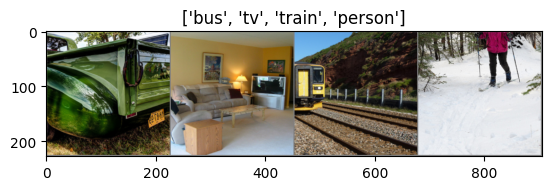

In [ ]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Training

### Trainer Function

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Training

In [ ]:
#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model = models.resnet101(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 68)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer,
                         exp_lr_scheduler, num_epochs=2)

torch.save(model.state_dict(), 'saved_model.pth')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 77.1MB/s]


Epoch 0/1
----------
train Loss: 3.8143 Acc: 0.1796
val Loss: 3.7955 Acc: 0.2488

Epoch 1/1
----------
train Loss: 3.3901 Acc: 0.2196
val Loss: 3.1900 Acc: 0.2887

Training complete in 62m 4s
Best val Acc: 0.288747


## Evaluation

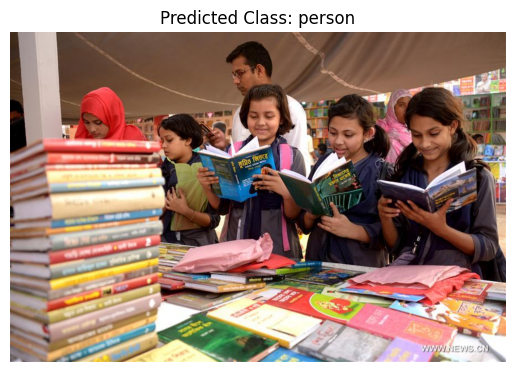

Predicted Class: person


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model's state dictionary
model.load_state_dict(torch.load('saved_model.pth'))
model.eval()

input_transforms = data_transforms['val']

# Load and preprocess the input image
input_image_path = '/content/bookWithPerson.jpg'  # Provide the path to your input image
input_image = Image.open(input_image_path)
input_tensor = input_transforms(input_image)
input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

# Move the input tensor to the appropriate device (CPU or GPU)
input_tensor = input_tensor.to(device)

# Make the prediction Model 1
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted_class = torch.max(outputs, 1)

# Get the class name from class_names list
predicted_class_name = class_names[predicted_class.item()]

# Display the input image
plt.imshow(input_image)
# plt.title(f'Predicted Class: {predicted_class_name}')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()

print(f'Predicted Class: {predicted_class_name}')